<a href="https://colab.research.google.com/github/Pradeep2535/NLP-Lab-Programs/blob/main/NLP_Lab_Programs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Common for all experiments

In [1]:
!pip install nltk

In [7]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_eng to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package averaged_perceptron_tagger_rus to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_rus.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package bcp47 to /root/nltk_d


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

#Exp 1 - TOKENIZE AND TAG SOME TEXT

In [2]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

In [8]:
sample_paragraph = """
While delivering a lecture at the Indian Institute of Management Shillong, Kalam collapsed and died from an apparent cardiac arrest on 27 July 2015, aged 83.
Thousands, including national-level dignitaries, attended the funeral ceremony held in his hometown of Rameswaram, where he was buried with full state honours.
"""

sentences = sent_tokenize(sample_paragraph)
sentences

['\nWhile delivering a lecture at the Indian Institute of Management Shillong, Kalam collapsed and died from an apparent cardiac arrest on 27 July 2015, aged 83.',
 'Thousands, including national-level dignitaries, attended the funeral ceremony held in his hometown of Rameswaram, where he was buried with full state honours.']

In [10]:
words = word_tokenize(sample_paragraph)
words

['While',
 'delivering',
 'a',
 'lecture',
 'at',
 'the',
 'Indian',
 'Institute',
 'of',
 'Management',
 'Shillong',
 ',',
 'Kalam',
 'collapsed',
 'and',
 'died',
 'from',
 'an',
 'apparent',
 'cardiac',
 'arrest',
 'on',
 '27',
 'July',
 '2015',
 ',',
 'aged',
 '83',
 '.',
 'Thousands',
 ',',
 'including',
 'national-level',
 'dignitaries',
 ',',
 'attended',
 'the',
 'funeral',
 'ceremony',
 'held',
 'in',
 'his',
 'hometown',
 'of',
 'Rameswaram',
 ',',
 'where',
 'he',
 'was',
 'buried',
 'with',
 'full',
 'state',
 'honours',
 '.']

In [13]:
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
tweet='this is a cool tweet #cool #cheers @pmmodi'
print(tt.tokenize(tweet))

['this', 'is', 'a', 'cool', 'tweet', '#cool', '#cheers', '@pmmodi']


#Exp - 2

In [91]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.8 MB/s eta 0:00:00


([<matplotlib.patches.Wedge at 0x79571c3eedd0>,
 [Text(7.34788079488412e-17, 1.2000000000000002, 'AI'),
  Text(-0.8485281374238572, -0.848528137423857, 'App Development'),
  Text(0.8485281374238569, -0.8485281374238572, 'Web development')])

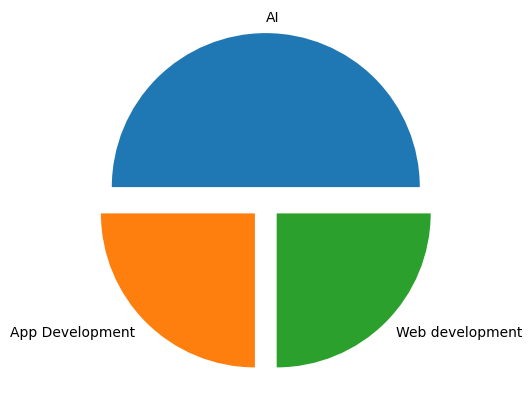

In [116]:
import PyPDF2
import pandas as pd
import re
import matplotlib.pyplot as plt

pdf = open('/content/pradeep s_resume.pdf','rb') #Change path for your resume
pdfReader = PyPDF2.PdfReader(pdf)

for i in range(len(pdfReader.pages)):
  text = pdfReader.pages[i].extract_text().lower()
  text = re.sub('[^a-z0-9]',' ',text)

terms = {
    'AI':['artifcial','intelligence','deep','learning','machine'],
    'App Development':['flutter','app','mobile'],
    'Web development':['flask','django','html','css','js','javascript','web','development']
}
scores = {key:0 for key in terms.keys()}
for key,values in terms.items():
  for word in values:
    if word in text:
      scores[key] += 1

df = pd.DataFrame(scores.items(),columns = ['Area','Score']).sort_values(by='Score',ascending=False)

plt.figure(figsize = (5,5))
plt.pie(df['Score'], labels = df['Area'], explode = (0.1,0.1,0.1))

#Exp - 3

In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
text = "I like to live long."
res = analyzer.polarity_scores(text)
compund_score = res['compound']
if compund_score>=0.05:
  print('positive')
elif compund_score<=-0.05:
  print('negative')
else:
  print('neutral')

print(f'Compund Score : {compund_score}')

positive
Compund Score : 0.3612


#Exp - 4

In [24]:
!pip install rake_nltk

In [27]:
from rake_nltk import Rake

rake = Rake()
text = "NLP is a part of Artificial intelligence. Its main application is Large Language Models."

rake.extract_keywords_from_text(text)
keywords = rake.get_ranked_phrases()
for i in keywords:
  print(i)

large language models
main application
artificial intelligence
part
nlp


#Exp - 5

In [34]:
!pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... done
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=8ff33294e4700f7316285f4751692d9e3ae31e141b0b39f206d63be284e25d7c
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans


In [30]:
!pip install translate

In [3]:
from googletrans import Translator as GoogleTranslator
from translate import Translator as SimpleTranslator

text = 'Hi, this is my fifth experiment in NLP.'

google_translator = GoogleTranslator()
simple_translator = SimpleTranslator(to_lang='ta')

google_translation = google_translator.translate(text,dest='ta')
simple_translation = simple_translator.translate(text)

print(google_translation)
print(simple_translation)

Translated(src=en, dest=ta, text=ஹாய், இது என்.எல்.பி.யில் எனது ஐந்தாவது சோதனை., pronunciation=None, extra_data="{'confiden...")
வணக்கம், இது NLP இல் எனது ஐந்தாவது பரிசோதனை.


#Exp - 6

[nltk_data] Error loading chat: Package 'chat' not found in index


False

In [88]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.chat.util import Chat, reflections
import re

message = "Hello! How are you?\nI'm doing well, thanks! What about you?"
message = word_tokenize(message.lower())
tokens = [word for word in message if word.isalnum() and word not in set(stopwords.words('english'))]

pairs = [
    ['(hi|hey|hello)',['Hello!', 'Hi there!', 'Hey!']],
    ['How are you',['I am fine.What about you?']],
    ['(.*)',['I am just a chatbot, not capable of understanding that.']]
]
chat = Chat(pairs, reflections)

while True:
  user = input("You : ")
  if user.lower().strip()=="quit":
    break
  print(chat.respond(user))



You : hi
Hey!
You : hey
Hi there!
You : hello
Hey!
You : how are you
I am fine.What about you?
You : tell about taj mahal
I am just a chatbot, not capable of understanding that.
You : quit


#Exp - 7, 9

In [4]:
!pip install transformers

In [89]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer

class CollegeEnquiryBot:
  def __init__(self):
    self.model = GPT2LMHeadModel.from_pretrained("gpt2")
    self.tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

  def generate_response(self,input, max_length=100):
    input_ids = self.tokenizer.encode(input,return_tensors='pt')
    output = self.model.generate(input_ids, num_beams = 5, top_k = 50, top_p = 0.95, no_repeat_ngram_size = 2, max_length=max_length)
    response = self.tokenizer.decode(output[0], skip_special_tokens=True)
    return response

def college_bot():


  while True:
    user = input("You : ")
    if user.lower().strip() == "quit":
      break
    cb = CollegeEnquiryBot()
    print(f"Bot : {cb.generate_response(user)}")

college_bot()

You : What is a college?


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


Bot : What is a college?

A college is an institution of higher learning. It's a place where you can learn something new. You can get a degree in a different field, but you don't have to go to college to do that. If you want to be a doctor or a lawyer, you're going to need to have a bachelor's degree. And if you have an MBA or Ph.D., you'll need a master's or doctorate in that field. So, if
You : quit


#Exp - 8

In [71]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

model = GPT2LMHeadModel.from_pretrained("gpt2")
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

text = "Pradeep is a"
next_words = 10
input_ids = tokenizer.encode(text, return_tensors='pt')

for _ in range(next_words):

  prob = model(input_ids).logits[:,-1,:]
  word_idx = torch.argmax(prob).item()

  word = tokenizer.decode([word_idx])

  text += " " + word

  input_ids = torch.cat([input_ids, torch.tensor([[word_idx]])],dim=-1)
print(text)

Pradeep is a  member  of  the  Indian  National  Congress  ( IN CC )
